<a href="https://colab.research.google.com/github/TanjinaHasan15/Data_Mining/blob/main/Problem_solving_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [18]:
df = pd.read_csv("titanic.csv")
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [19]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [20]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.drop('Cabin', axis=1, inplace=True)
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


/tmp/ipython-input-2528952521.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [21]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)].copy()

print(f"Original shape: {df.shape}")
print(f"Shape after outlier removal: {df_cleaned.shape}")

Original shape: (891, 11)
Shape after outlier removal: (775, 11)


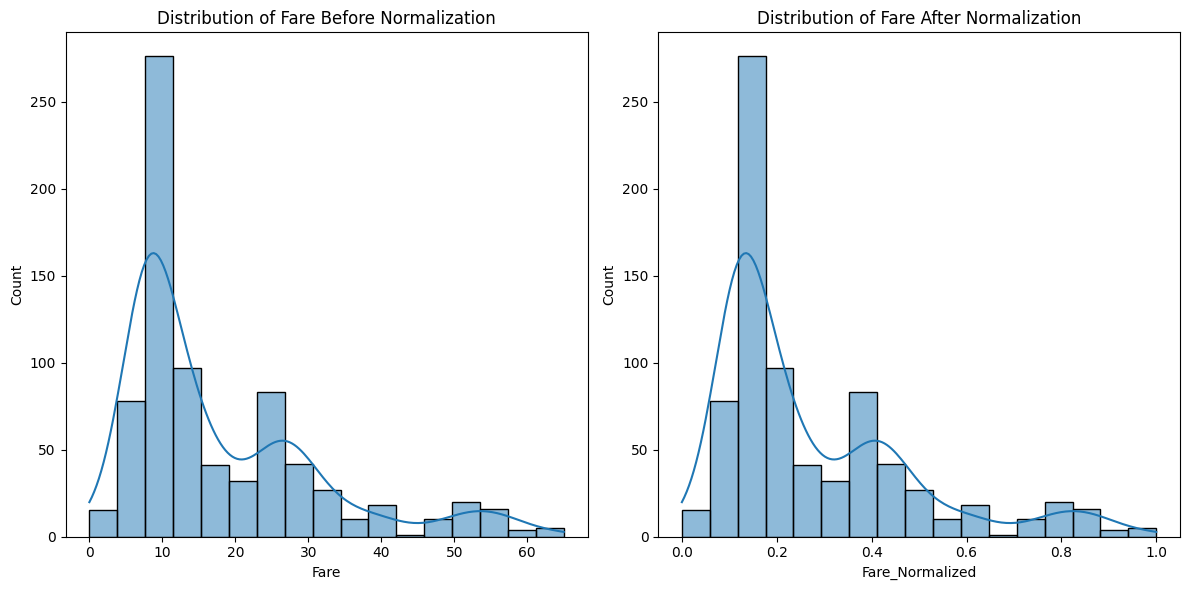

In [26]:
scaler = MinMaxScaler()
df_cleaned['Fare_Normalized'] = scaler.fit_transform(df_cleaned[['Fare']])


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['Fare'], kde=True)
plt.title('Distribution of Fare Before Normalization')


plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['Fare_Normalized'], kde=True)
plt.title('Distribution of Fare After Normalization')

plt.tight_layout()
plt.show()

In [25]:
correlation_matrix = df_cleaned.corr(numeric_only=True)
display(correlation_matrix)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.024438,-0.045179,0.015393,-0.080426,-0.015117,0.002942
Survived,-0.024438,1.000000,-0.238532,-0.121283,-0.003156,0.098575,0.234422
Pclass,-0.045179,-0.238532,1.000000,-0.342826,0.113943,0.083451,-0.589776
Age,0.015393,-0.121283,-0.342826,1.000000,-0.340947,-0.212343,0.078863
SibSp,-0.080426,-0.003156,0.113943,-0.340947,1.000000,0.410182,0.370388
Parch,-0.015117,0.098575,0.083451,-0.212343,0.410182,1.000000,0.336844
Fare,0.002942,0.234422,-0.589776,0.078863,0.370388,0.336844,1.000000


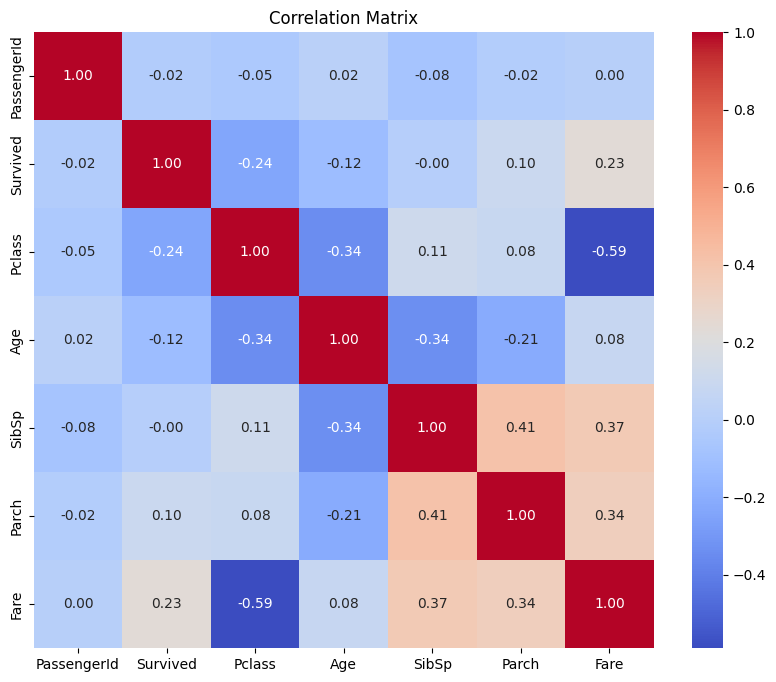

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()